In [8]:
import pandas as pd
import seaborn as sns

In [9]:
df=pd.read_csv('Social_Network_Ads.csv')

In [10]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


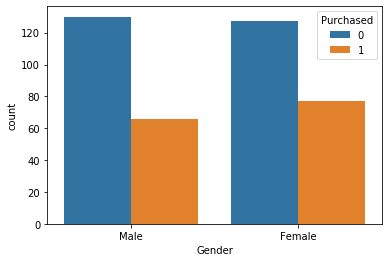

In [15]:
sns.countplot(x='Gender',data=df,hue='Purchased')

In [16]:
df=pd.get_dummies(df, columns=['Gender'], drop_first=True )
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [18]:
df.drop('User ID', axis=1, inplace=True)

In [19]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


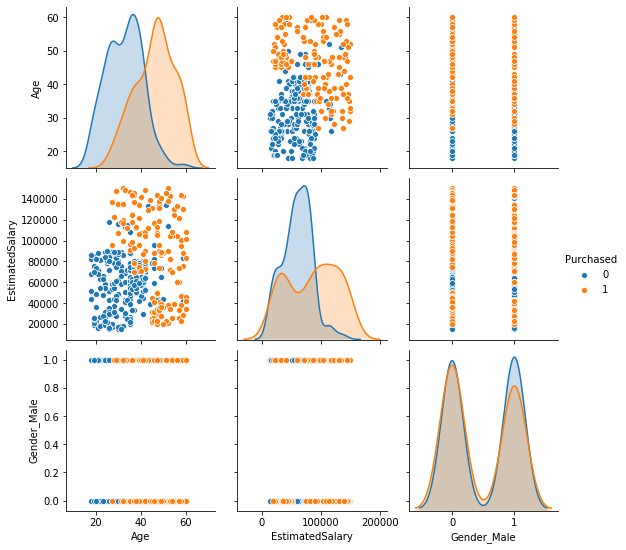

In [20]:
sns.pairplot(df, hue='Purchased')

### SVC or KNN

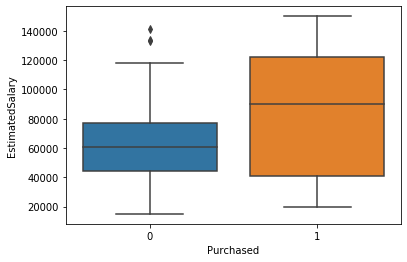

In [66]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=df)

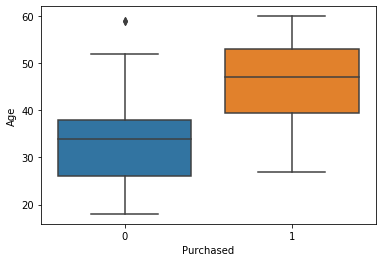

In [43]:
sns.boxplot(x='Purchased',y='Age',data=df)

In [44]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']


In [45]:
x

,Age,EstimatedSalary,Gender_Male
0,19,19000.0,1
1,35,20000.0,1
2,26,43000.0,0
3,27,57000.0,0
4,19,76000.0,1
...,...,...,...
395,46,41000.0,0
396,51,23000.0,1
397,50,20000.0,0
398,36,33000.0,1


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y, random_state=42)
y_train.value_counts()/len(y_train)

0    0.64375
1    0.35625
Name: Purchased, dtype: float64

In [59]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)

In [60]:
y_train.value_counts()

1    206
0    206
Name: Purchased, dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score

In [64]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBC':XGBClassifier(),
    'NB':GaussianNB()
}

In [65]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'f1score: {f1_score(y_test,y_pred)}')
    print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print('__'*30)

using: LR
train accuarcy:0.8640776699029126
test accuarcy:0.7875
recall: 0.7931034482758621
precision: 0.6764705882352942
f1score: 0.7301587301587301
fbeta: 0.696969696969697
____________________________________________________________
using: KNN
train accuarcy:0.9271844660194175
test accuarcy:0.9
recall: 0.896551724137931
precision: 0.8387096774193549
f1score: 0.8666666666666666
fbeta: 0.8496732026143791
____________________________________________________________
using: DT
train accuarcy:0.9975728155339806
test accuarcy:0.875
recall: 0.8620689655172413
precision: 0.8064516129032258
f1score: 0.8333333333333334
fbeta: 0.8169934640522875
____________________________________________________________
using: SVC
train accuarcy:0.9174757281553398
test accuarcy:0.9125
recall: 0.9310344827586207
precision: 0.84375
f1score: 0.8852459016393444
fbeta: 0.8598726114649683
____________________________________________________________
using: RF
train accuarcy:0.9951456310679612
test accuarcy:0.9
recal

C:\Myanaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


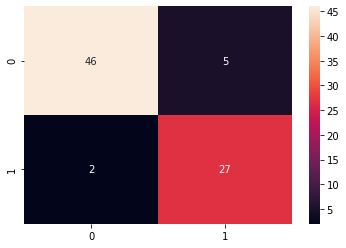

In [77]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
import joblib
joblib.dump(model, 'model.h5')
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# Titanic Dataset

In [312]:
df=pd.read_csv('Titanic.csv')

In [313]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [314]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [315]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [316]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [317]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
df['Embarked']=imputer.fit_transform(df[['Embarked']])
df.isnull().sum()
print(imputer.statistics_)

['S']


In [318]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [319]:
df.drop('Cabin', axis=1, inplace=True)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [321]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df['Age']=imputer.fit_transform(df[['Age']])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [322]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [323]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [324]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [325]:
df.drop('PassengerId', axis=1, inplace=True)

In [326]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


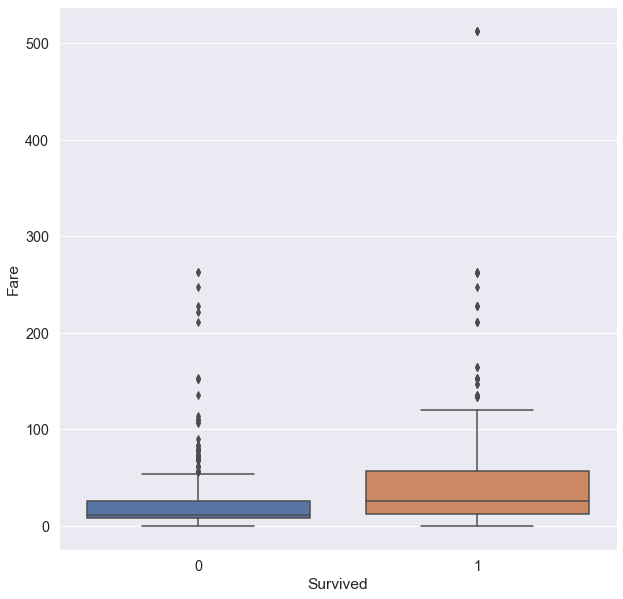

In [327]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
sns.boxplot(x='Survived',y='Fare',data=df)

In [333]:
indx=detect_outliers(df,0,['Fare'])
print(f'indicies of the outliers in {col} are:{indx}')
df.loc[indx,'Fare']=df['Fare'].median()

indicies of the outliers in Fare are:[]


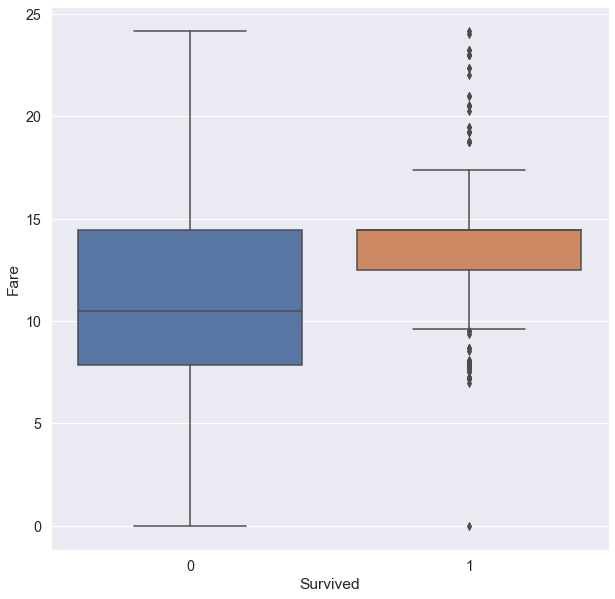

In [334]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
sns.boxplot(x='Survived',y='Fare',data=df)

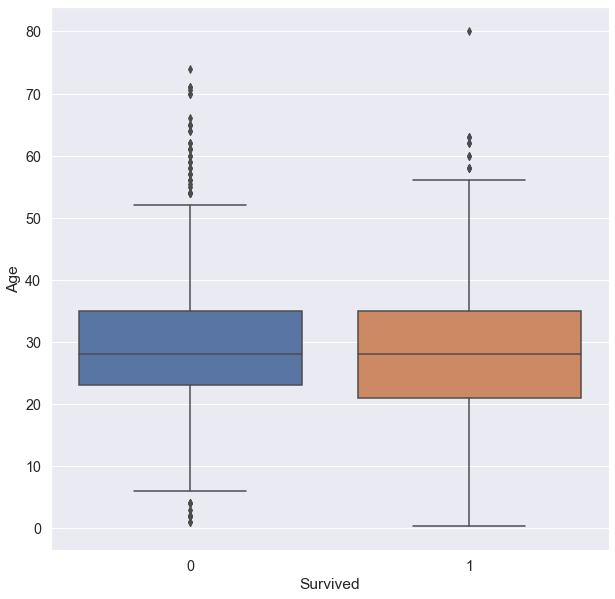

In [335]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
sns.boxplot(x='Survived',y='Age',data=df)

In [336]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,12.086048
std,0.486592,0.836071,13.019697,1.102743,0.806057,4.230027
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,14.454200
max,1.000000,3.000000,80.000000,8.000000,6.000000,24.150000


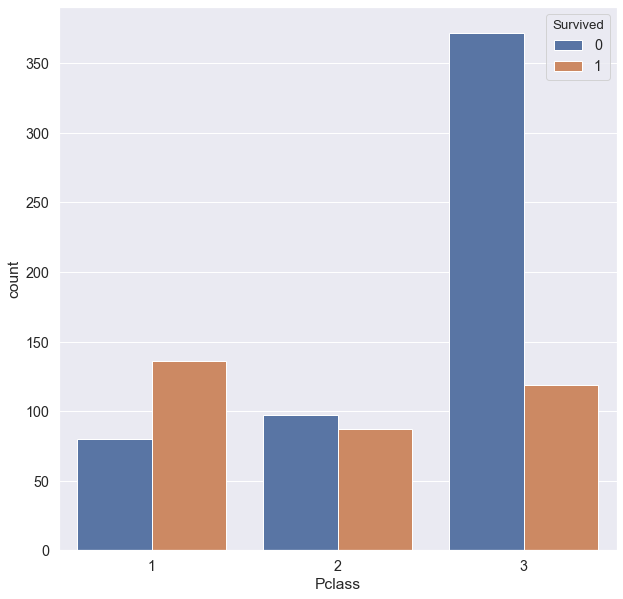

In [337]:
sns.countplot(x='Pclass',data=df, hue='Survived')

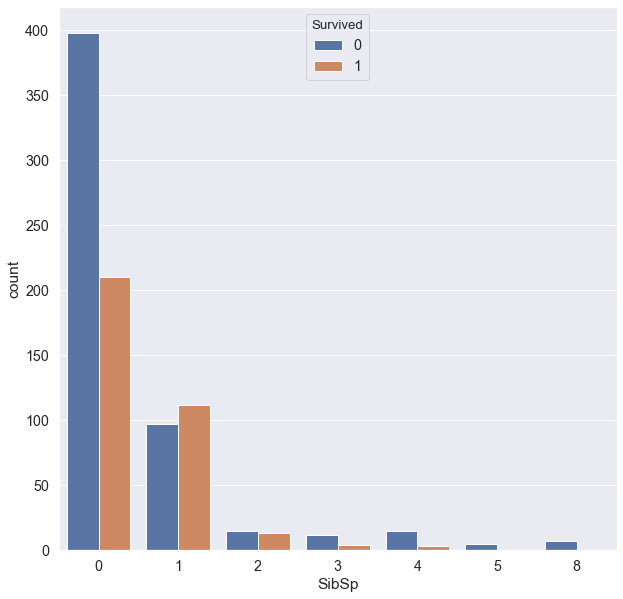

In [338]:
sns.countplot(x='SibSp',data=df, hue='Survived')

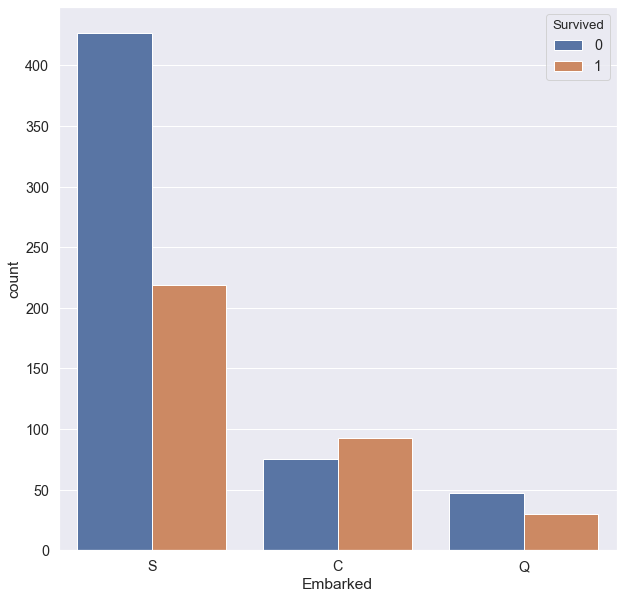

In [339]:
sns.countplot(x='Embarked',data=df, hue='Survived')

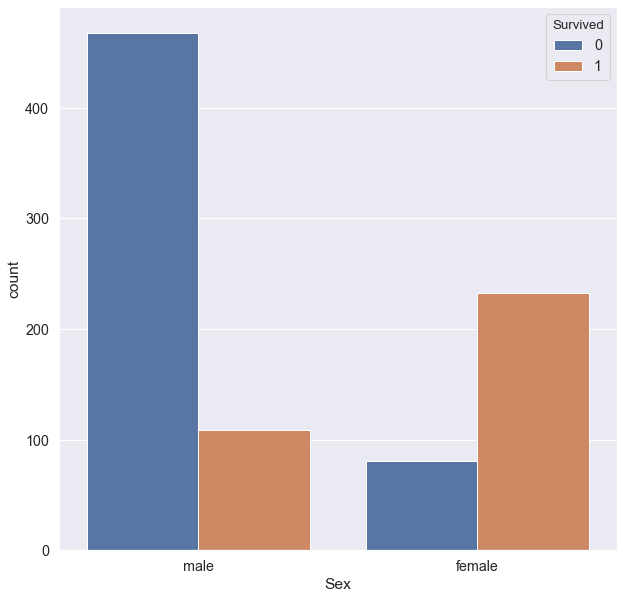

In [340]:
sns.countplot(x='Sex',data=df, hue='Survived')

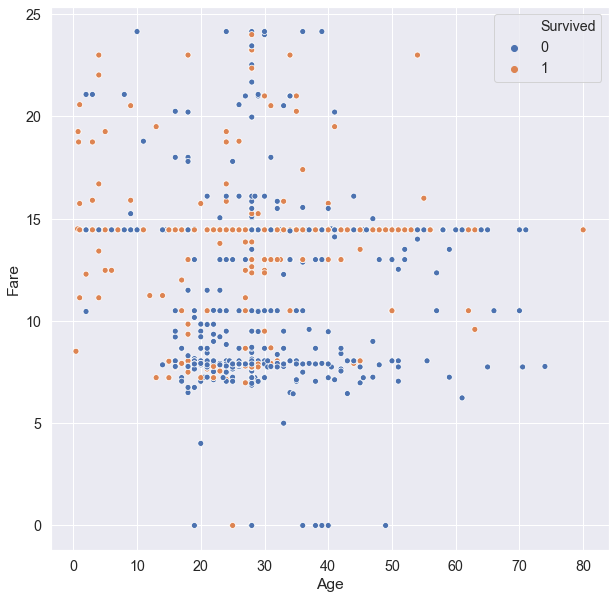

In [350]:
sns.scatterplot(data= df, x="Age", y="Fare", hue="Survived")

In [343]:
df=pd.get_dummies(df,columns=['Embarked','Sex'],drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,14.4542,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,14.4542,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,1
887,1,1,19.0,0,0,14.4542,0,1,0
888,0,3,28.0,1,2,23.4500,0,1,0
889,1,1,26.0,0,0,14.4542,0,0,1


In [345]:
x=df.drop('Survived',axis=1)
y=df['Survived']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y, random_state=42)
y_train.value_counts()/len(y_train)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [346]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)

In [347]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [348]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'f1score: {f1_score(y_test,y_pred)}')
    print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print('__'*30)

using: LR
train accuarcy:0.8132118451025057
test accuarcy:0.8324022346368715
recall: 0.7681159420289855
precision: 0.7910447761194029
f1score: 0.7794117647058824
fbeta: 0.7863501483679525
____________________________________________________________
using: KNN
train accuarcy:0.8656036446469249
test accuarcy:0.8156424581005587
recall: 0.7391304347826086
precision: 0.7727272727272727
f1score: 0.7555555555555555
fbeta: 0.7657657657657658
____________________________________________________________
using: DT
train accuarcy:0.9760820045558086
test accuarcy:0.7877094972067039
recall: 0.6666666666666666
precision: 0.7540983606557377
f1score: 0.7076923076923076
fbeta: 0.7348242811501597
____________________________________________________________
using: SVC
train accuarcy:0.8473804100227791
test accuarcy:0.8212290502793296
recall: 0.7246376811594203
precision: 0.7936507936507936
f1score: 0.7575757575757576
fbeta: 0.778816199376947
____________________________________________________________
usi

C:\Myanaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


C:\Myanaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


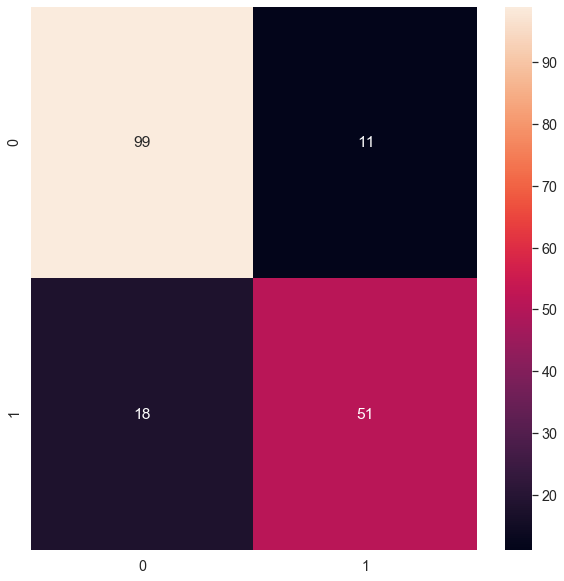

In [355]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
import joblib
joblib.dump(model, 'model.h5')
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)